In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financials/Financials.csv


In [2]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('/kaggle/input/financials/Financials.csv')

# Display the first few rows of the dataframe
df.head()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [3]:
# Display the column names
df.columns


Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [4]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the corrected column names
df.columns


Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [5]:
# Function to convert values in parentheses to negative numbers
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',', ''))
        else:
            return float(val)
    else:
        return val

In [6]:
# List of columns to clean
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']


In [7]:
# Remove '$', '-' and ',' from the columns, convert values in parentheses to negative numbers, convert empty strings to NaN, and then convert to float
for col in columns_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the cleaned data
df.head()


/tmp/ipykernel_20/3695845960.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


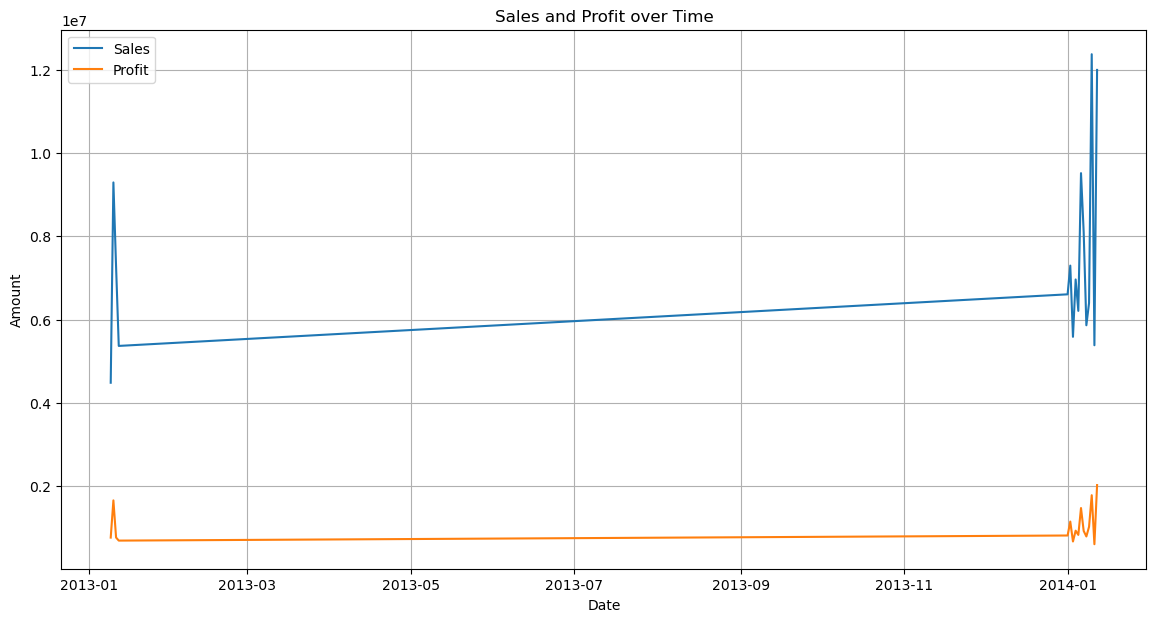

In [8]:
import matplotlib.pyplot as plt

# Group data by Date
grouped_df = df.groupby('Date').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, grouped_df['Sales'], label='Sales')
plt.plot(grouped_df.index, grouped_df['Profit'], label='Profit')
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()


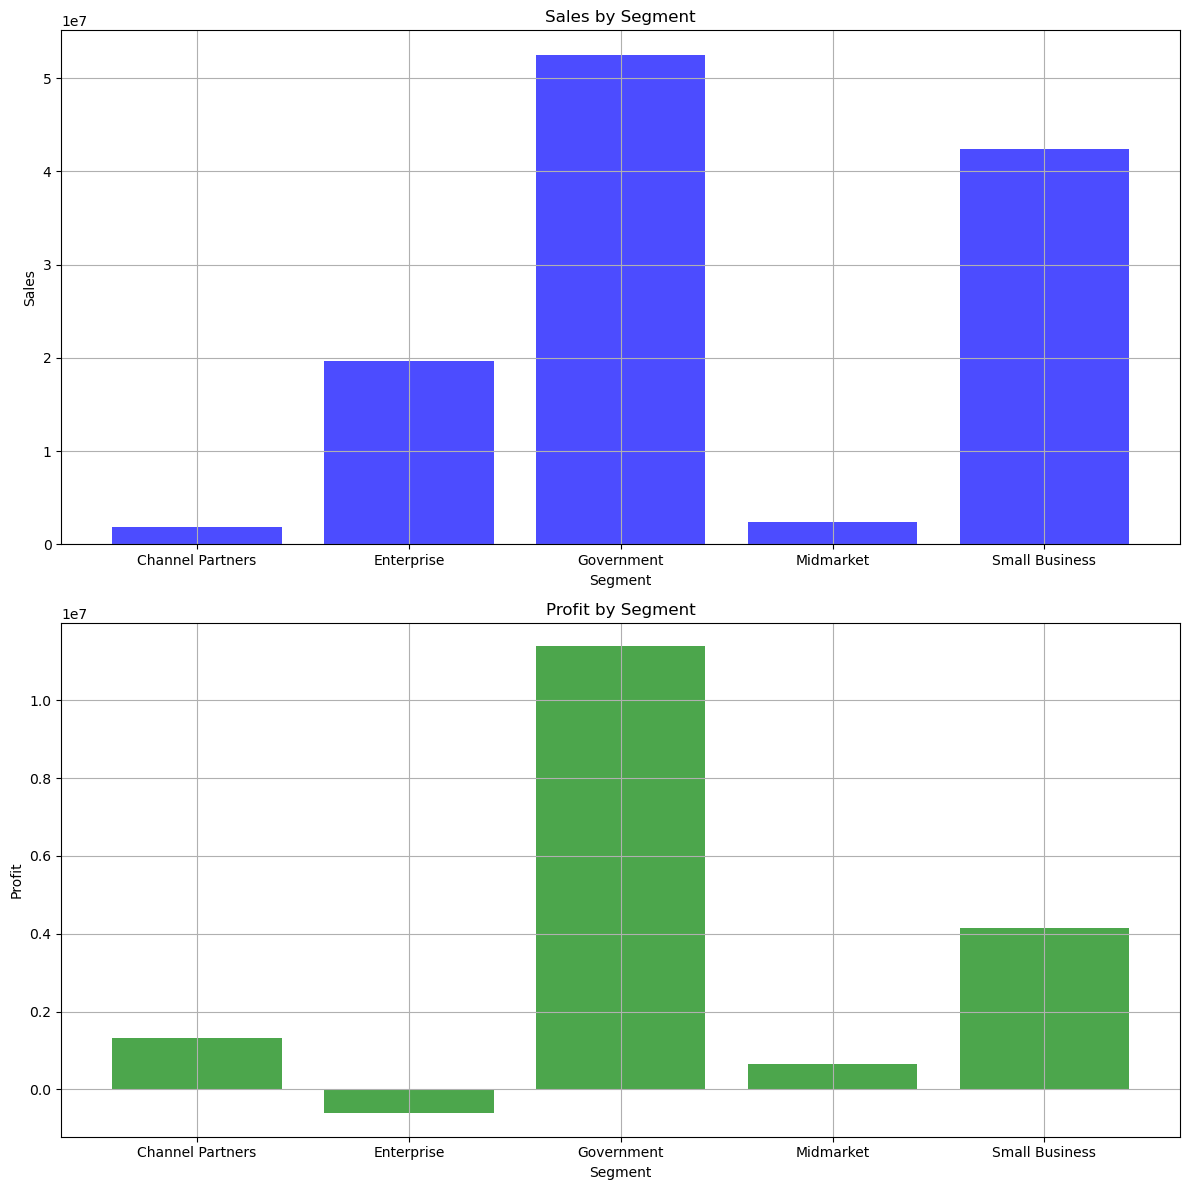

In [9]:
# Group data by Segment
grouped_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit by Segment
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(grouped_segment.index, grouped_segment['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Sales by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Sales')
ax[0].grid()

ax[1].bar(grouped_segment.index, grouped_segment['Profit'], color='green', alpha=0.7)
ax[1].set_title('Profit by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Profit')
ax[1].grid()

plt.tight_layout()
plt.show()


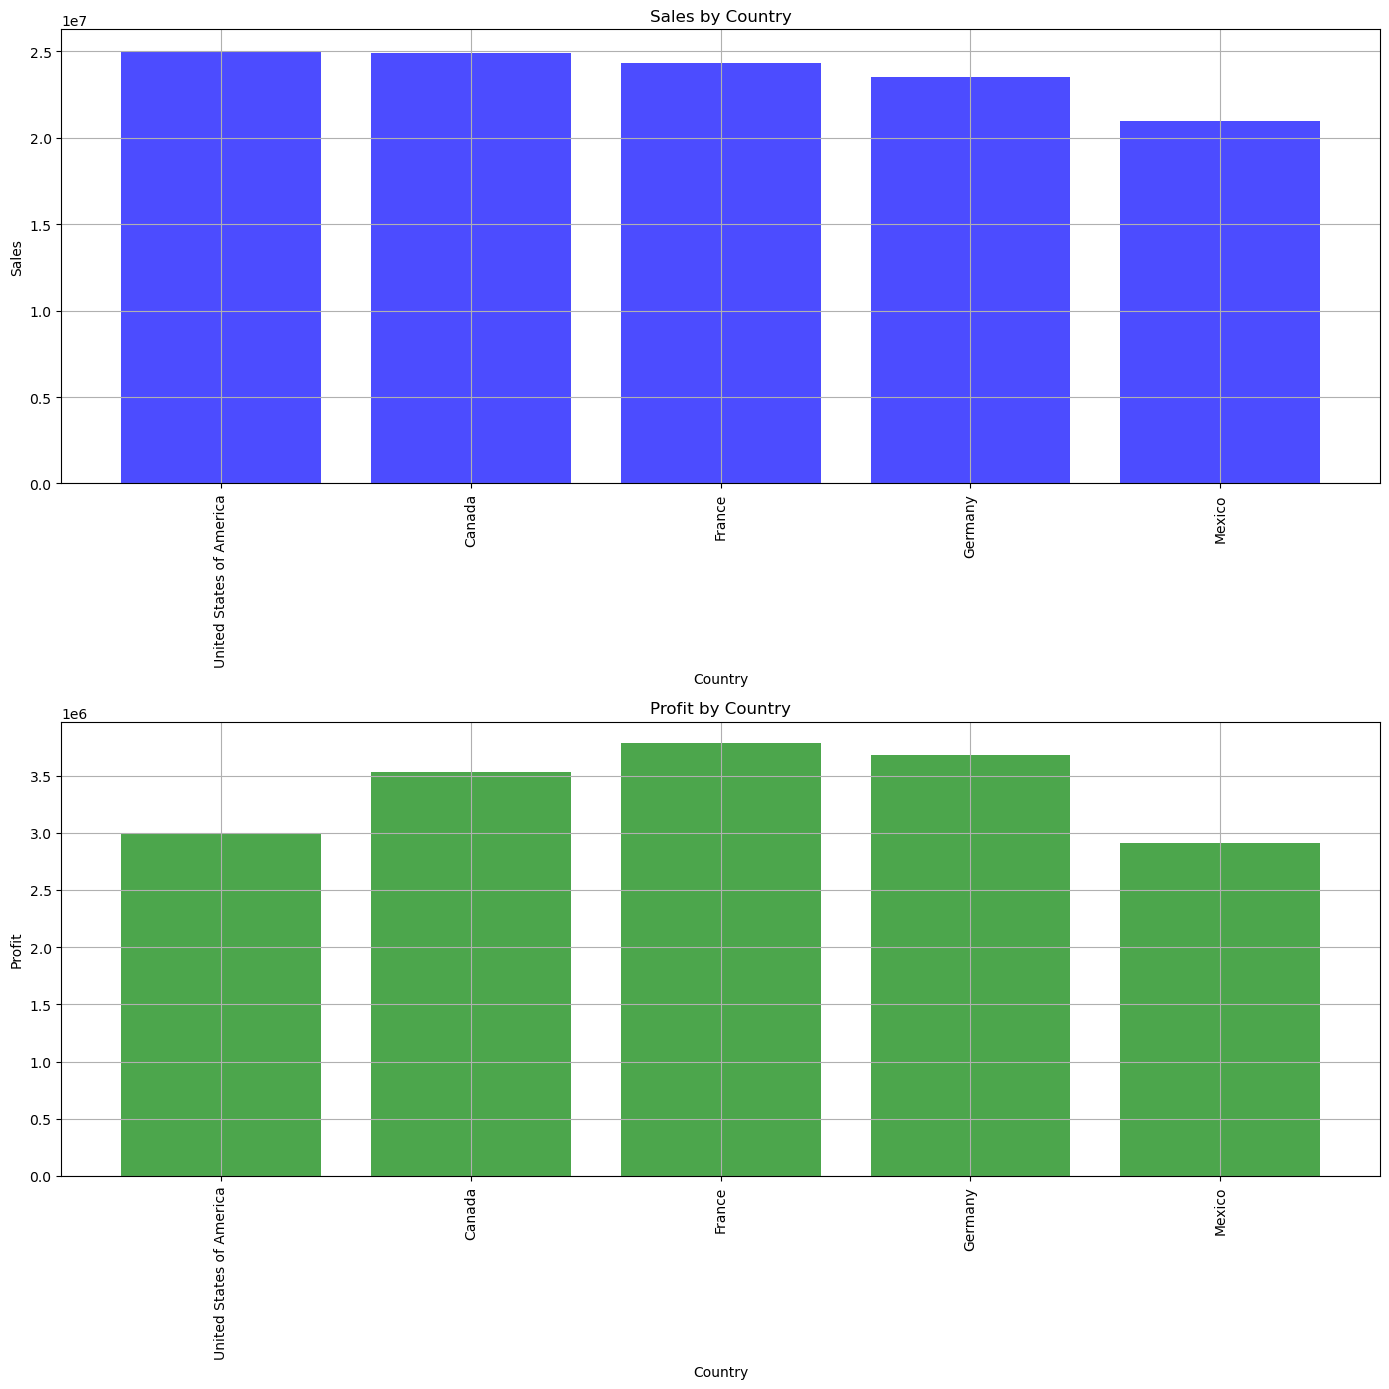

In [10]:
# Group data by Country
grouped_country = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_country = grouped_country.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Country
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_country.index, grouped_country['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Sales by Country')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=90)
ax[0].grid()

ax[1].bar(grouped_country.index, grouped_country['Profit'], color='green', alpha=0.7)
ax[1].set_title('Profit by Country')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x', rotation=90)
ax[1].grid()

plt.tight_layout()
plt.show()


In [11]:
# Summary statistics for 'Discounts'
df['Discounts'].describe()


count       647.000000
mean      14227.586198
std       23562.833079
min          18.410000
25%        1061.000000
50%        3108.000000
75%       18809.250000
max      149677.500000
Name: Discounts, dtype: float64

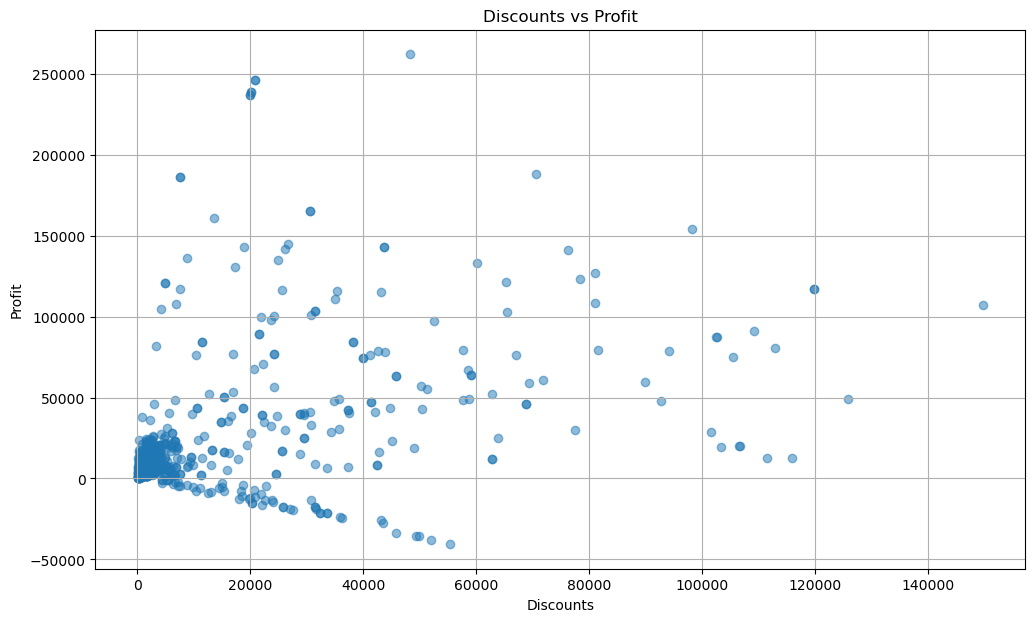

In [12]:
# Create a scatter plot of 'Discounts' vs 'Profit'
plt.figure(figsize=(12, 7))
plt.scatter(df['Discounts'], df['Profit'], alpha=0.5)
plt.title('Discounts vs Profit')
plt.xlabel('Discounts')
plt.ylabel('Profit')
plt.grid()
plt.show()


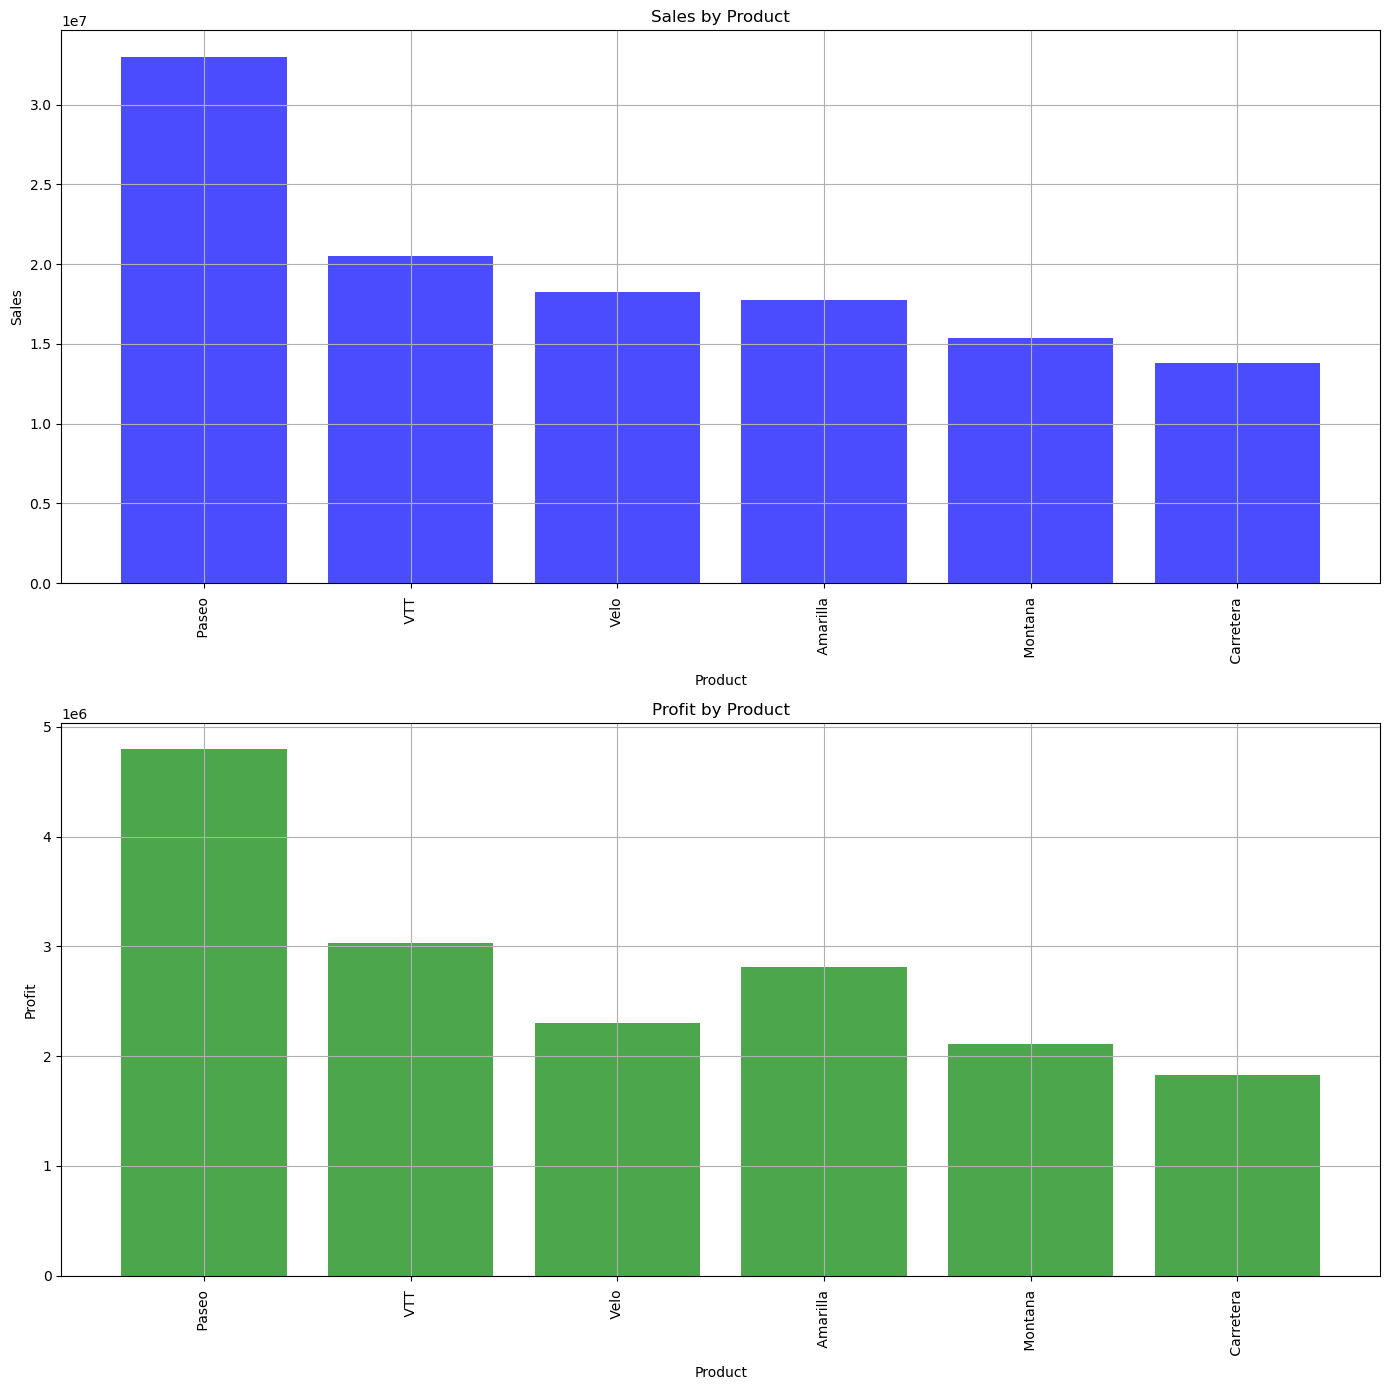

In [13]:
# Group data by Product
grouped_product = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_product = grouped_product.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Product
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_product.index, grouped_product['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Sales by Product')
ax[0].set_xlabel('Product')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=90)
ax[0].grid()

ax[1].bar(grouped_product.index, grouped_product['Profit'], color='green', alpha=0.7)
ax[1].set_title('Profit by Product')
ax[1].set_xlabel('Product')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x', rotation=90)
ax[1].grid()

plt.tight_layout()
plt.show()


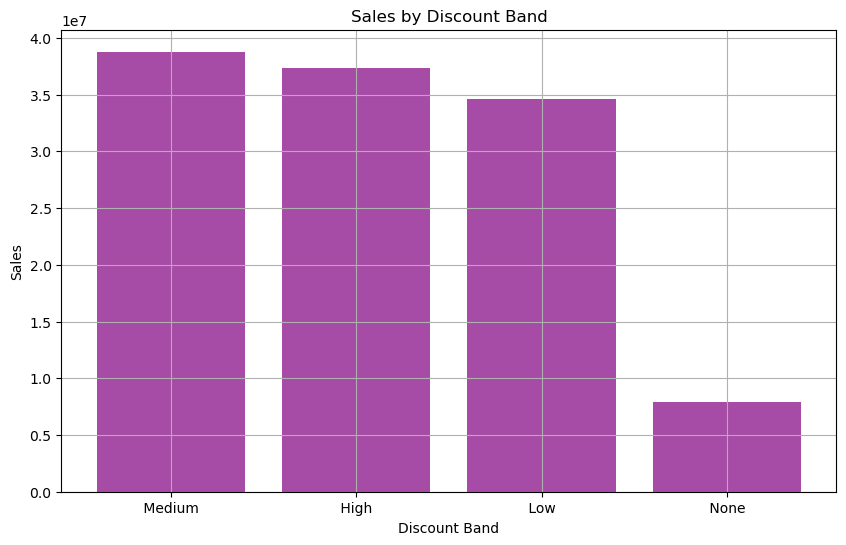

In [14]:
# Group data by Discount Band
grouped_discount = df.groupby('Discount Band').agg({'Sales': 'sum'})

# Sort data by Sales
grouped_discount = grouped_discount.sort_values(by='Sales', ascending=False)

# Plot Sales by Discount Band
plt.figure(figsize=(10, 6))
plt.bar(grouped_discount.index, grouped_discount['Sales'], color='purple', alpha=0.7)
plt.title('Sales by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Sales')
plt.grid()
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


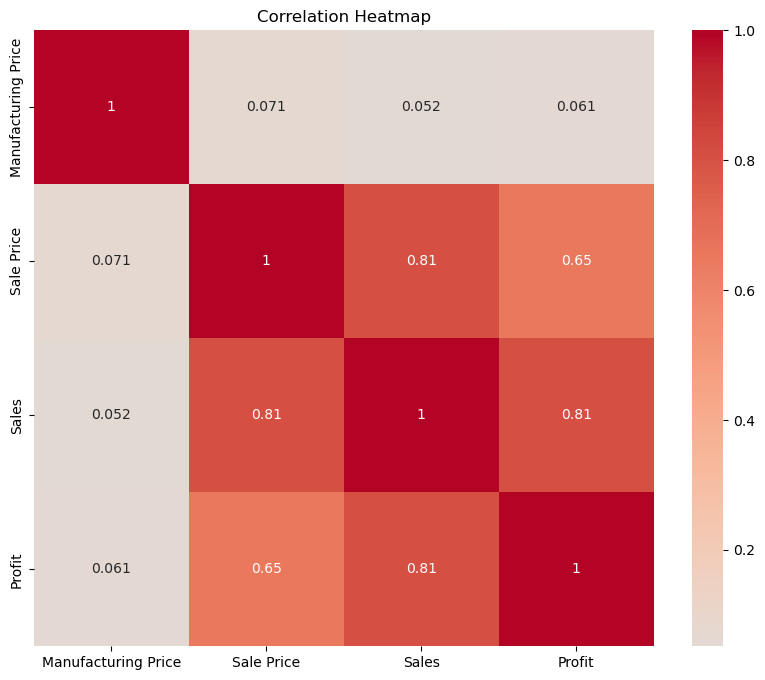

In [15]:
import seaborn as sns

# Calculate correlation
correlation = df[['Manufacturing Price', 'Sale Price', 'Sales', 'Profit']].corr()

# Plot heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


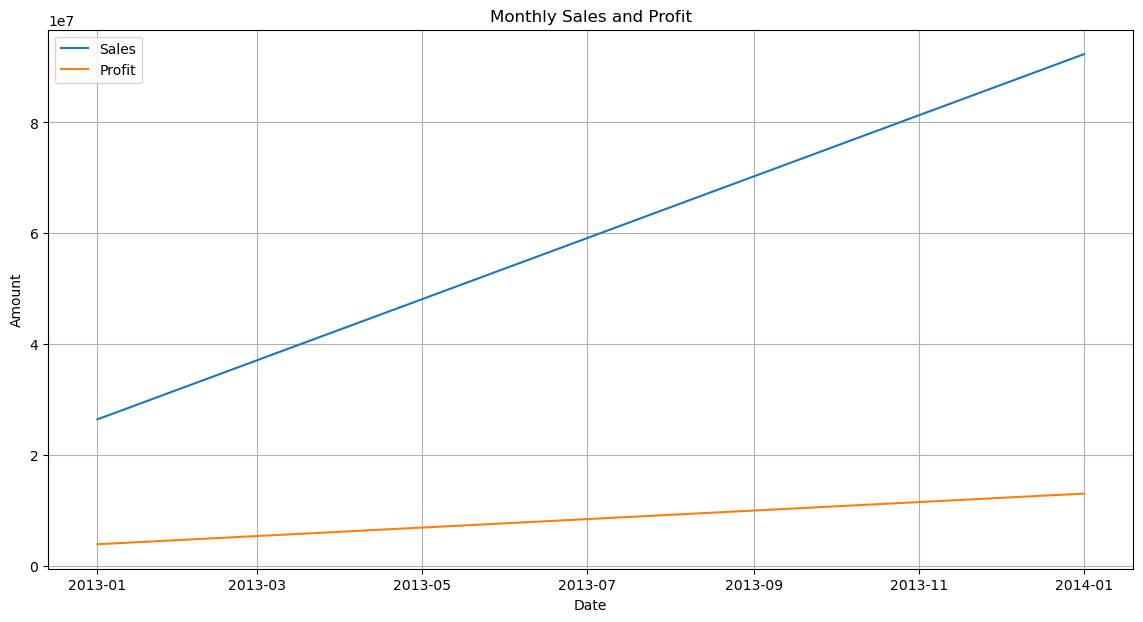

In [16]:
# Create a new dataframe with total monthly sales and profit
monthly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_data.index.names = ['Year', 'Month']
monthly_data.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_data['Year-Month'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

# Plot monthly sales and profit
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Year-Month'], monthly_data['Sales'], label='Sales')
plt.plot(monthly_data['Year-Month'], monthly_data['Profit'], label='Profit')
plt.title('Monthly Sales and Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()
